<h3>Plotting Legendre polynomial (n=5) using shooting method</h3>

For n=5, the Legendre polynomial satisfies the ODE
\begin{equation}
y''=\frac{1}{1-x^2}[2xy'-n(n+1)y]
\end{equation}
with the boundary conditions 
\begin{equation}
y(0)=0, y(1)=1. 
\end{equation}
In order to apply the shooting method here, we rewrite this problem as such: 
\begin{eqnarray}
&y'=z  \\
&z'=\frac{1}{1-x^2}[2xy'-n(n+1)y]
\end{eqnarray}
with the initial conditions 
\begin{equation}
y(0)=0, z(0)=y'_a. 
\end{equation}
where $y'_a$ is to be adjusted as to satisfy the boundary condition that $y(1)=1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

In [2]:
def rk4(x,w,f,h):    
    k1 = h*np.asarray(f(x,w))
    k2 = h*np.asarray(f(x+h/2,w+k1/2))
    k3 = h*np.asarray(f(x+h/2,w+k2/2))
    k4 = h*np.asarray(f(x+h,w+k3))
    
    return w + (k1+2*k2+2*k3+k4)/6

0  x_last: 0.9999999999999062  y'(0): 2.5  target_err: 0.3333333334070814
1  x_last: 0.9999999999999062  y'(0): 1.75  target_err: 0.06666666661504017
2  x_last: 0.9999999999999062  y'(0): 2.125  target_err: 0.13333333339601539
3  x_last: 0.9999999999999062  y'(0): 1.9375  target_err: 0.03333333339048439
4  x_last: 0.9999999999999062  y'(0): 1.84375  target_err: 0.016666666612267123
5  x_last: 0.9999999999999062  y'(0): 1.890625  target_err: 0.008333333389109132
6  x_last: 0.9999999999999062  y'(0): 1.8671875  target_err: 0.004166666611584713
7  x_last: 0.9999999999999062  y'(0): 1.87890625  target_err: 0.002083333388763098
8  x_last: 0.9999999999999062  y'(0): 1.873046875  target_err: 0.0010416666114102524
9  x_last: 0.9999999999999062  y'(0): 1.8759765625  target_err: 0.0005208333886641547
10  x_last: 0.9999999999999062  y'(0): 1.87451171875  target_err: 0.0002604166113628903
11  x_last: 0.9999999999999062  y'(0): 1.875244140625  target_err: 0.00013020838866206752
12  x_last: 0.999999

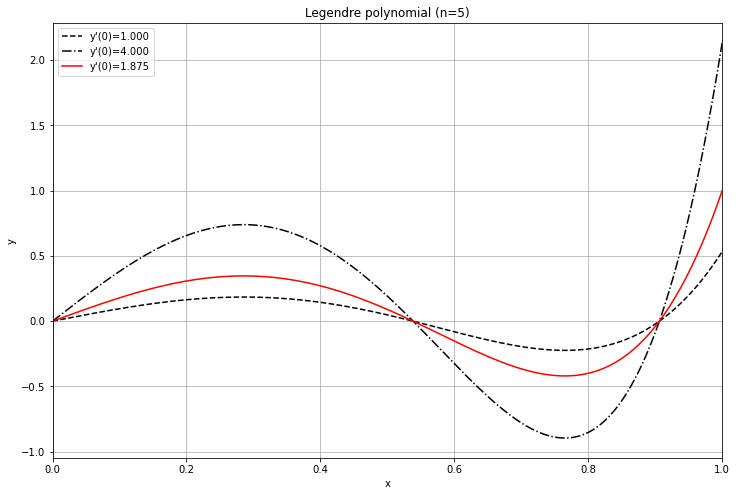

In [3]:
h = 1e-4
max_iter = 100
eps = 1e-8
z_min = 1
z_max = 4

x_start = 0
x_end = 0.9999  # unexpected results occur if too close to 1
y_target = 1  # y(1) = 1

f = lambda x,w: [w[1],1/(1-x**2)*(2*x*w[1]-5*(5+1)*w[0])]

# plot polynomial using z_min
w = [0,z_min]
x = x_start
xs = [x]
ys = [w[0]]
while x < x_end:
    w = rk4(x,w,f,h)
    x += h
    xs.append(x)
    ys.append(w[0])
plt.plot(xs,ys,'k--',label="y'(0)="+'{:.3f}'.format(float(z_min)))

# plot polynomial using z_max
w = [0,z_max]
x = x_start
xs = [x]
ys = [w[0]]
while x < x_end:
    w = rk4(x,w,f,h)
    x += h
    xs.append(x)
    ys.append(w[0])
plt.plot(xs,ys,'k-.',label="y'(0)="+'{:.3f}'.format(float(z_max)))

# estimate the points of the polynomial using bisection then plot
for i in range(max_iter):
    z = (z_min+z_max)/2
    w = [0,z]
    x = x_start
    xs = [x]
    ys = [w[0]]
    while x < x_end:
        w = rk4(x,w,f,h)
        x += h
        xs.append(x)
        ys.append(w[0])
    print(i,' x_last:',x," y'(0):",z,' target_err:',abs(w[0]-y_target))
    if abs(w[0] - y_target) < eps:
        break
    if w[0] > y_target:
        z_max = z
    else:
        z_min = z
plt.plot(xs,ys,'r',label="y'(0)="+'{:.3f}'.format(float(z)))

plt.title('Legendre polynomial (n=5)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.grid()
plt.legend()